In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pandas as pd
from astropy.io import fits
from pylab import cm

%matplotlib inline

In [2]:
wiener_kappa = fits.open('DESY3_wiener_filter_kappa.fits')[1].data['WF_E_noise']

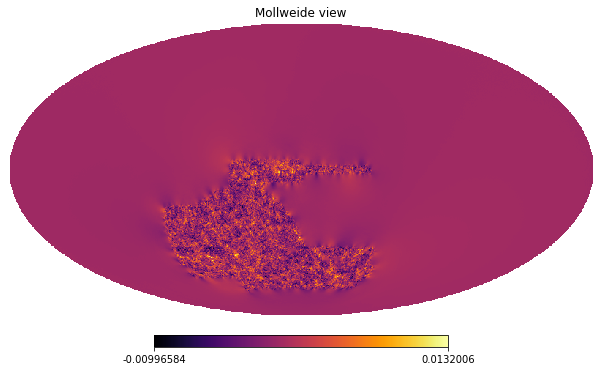

In [3]:
hp.mollview(wiener_kappa, cmap="inferno")

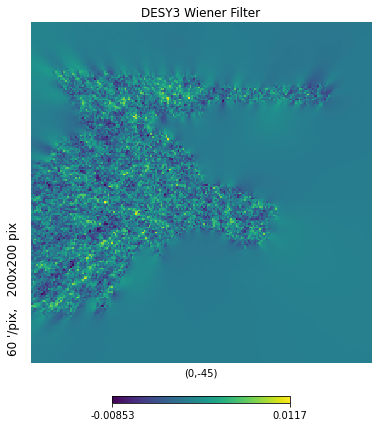

In [5]:
hp.gnomview(wiener_kappa, rot=[0, -45], reso=60, title="DESY3 Wiener Filter")

In [7]:
mask = hp.read_map("DESY3_sky_mask.fits").astype(np.bool_)
wiener_kappa_masked = hp.ma(wiener_kappa)
wiener_kappa_masked.mask = np.logical_not(mask)
masked_map=np.where(mask==True, wiener_kappa, hp.UNSEEN)

masked_array(
  data=[[-0.0010351253624819121, -0.0001255993468614661,
         -0.00012252760605918427, ..., --, --, --],
        [-0.005342013904118984, -0.0009508703846816853,
         -0.000923096364616785, ..., --, --, --],
        [-0.00565708279126036, -0.0041773927582655565,
         -0.0010006634835038213, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1.6375e+30)

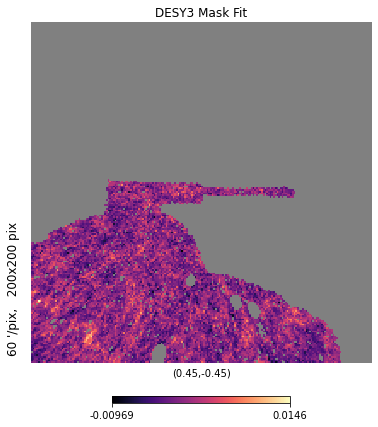

In [61]:
hp.gnomview(wiener_kappa_masked.filled(), rot=[0.45, -0.45], reso=60, cmap="magma", title="DESY3 Mask Fit", return_projected_map=True)
#DESY3_masked_array = return_projected_map=True
#DESY3_masked_array.head()
#masked_array.head()

In [49]:
#np.save('DES3Y_masked_array.npy', mask)


In [57]:
#df = pd.DataFrame(eval(DESY3_masked_array))
#pd.DataFrame(DESY3_masked_array).to_csv("DESY3_masked_array.csv")

TypeError: eval() arg 1 must be a string, bytes or code object

Text(0.5, 1.0, 'Histogram of DESY3 Masked Data')

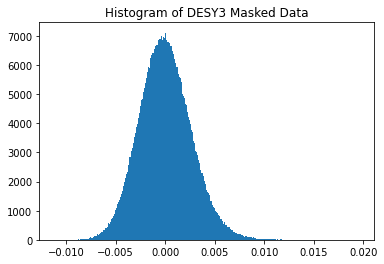

In [12]:
plt.hist(wiener_kappa_masked.compressed(), bins=1000);
plt.title("Histogram of DESY3 Masked Data")

In [14]:
LMAX = 1024
cl = hp.anafast(wiener_kappa_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

#hp.anafast is a nice tool for computing angular power spectra from maps

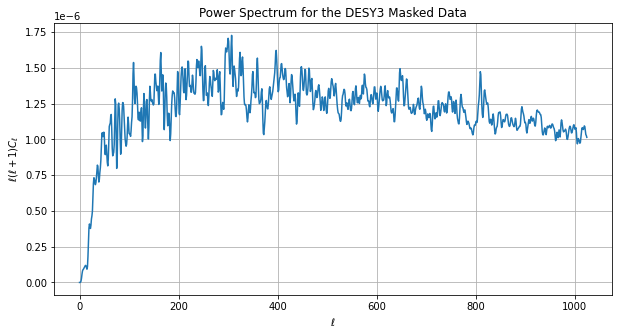

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell+1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.title("Power Spectrum for the DESY3 Masked Data")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

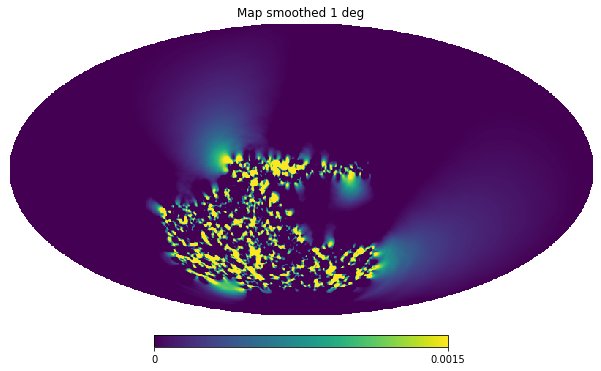

In [42]:
wiener_kappa_smoothed = hp.smoothing(wiener_kappa, fwhm=np.radians(1.))
hp.mollview(wiener_kappa_smoothed, min=0, max=0.0015, title="Map smoothed 1 deg")
